In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

import random
import pickle

import time

import sys
sys.path.append("../../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
with open('../../data/pickle/20221108v1_5y.pickle', mode='rb') as f:
    ws = pickle.load(f)

In [3]:
all_member = create_all_member(ws, 2030)

In [4]:
output = pd.DataFrame()

for c in ws.country_leagues:
    output = pd.concat([output, c.players_result])

output = pd.concat([output, ws.players_result])
output = output.sort_values("年度")
ws.players_result = output

# 結果一覧

## リーグ・カップ戦結果

In [5]:
print("チーム一覧")
print()

for c in ws.country_leagues:
    for league_num in range(len(c.leagues)):
        print(c.leagues[league_num].name)
        print([[i, t.name] for i, t in enumerate(c.leagues[league_num].teams)])

    print()

for c in ws.country_leagues:
    for league_num in range(len(c.leagues)):
        display(c.leagues[league_num].champion)

    display(c.competition_result_top)

チーム一覧

premier
[[0, 'Arsenal'], [1, 'AstonVilla'], [2, 'Brighton'], [3, 'CrystalPalace'], [4, 'Fulham'], [5, 'Leeds'], [6, 'Leicester'], [7, 'Liverpool'], [8, 'ManchesterUnited'], [9, 'Southampton'], [10, 'Tottenham'], [11, 'WestHam'], [12, 'Wolverhampton'], [13, 'Bournemouth'], [14, 'Bristol'], [15, 'Blackpool'], [16, 'QPR'], [17, 'Huddersfield'], [18, 'Gillingham'], [19, 'Sunderland']]
Championship
[[0, 'Blackburn'], [1, 'Burnely'], [2, 'Cardiff'], [3, 'Reading'], [4, 'Stoke'], [5, 'Everton'], [6, 'Portsmouth'], [7, 'ManchesterCity'], [8, 'Doncaster'], [9, 'Rotherham'], [10, 'ShefieldWednesday'], [11, 'Newcastle'], [12, 'Birmingham'], [13, 'Norwich'], [14, 'Brentford'], [15, 'Preston'], [16, 'Chelsea'], [17, 'Crewe'], [18, 'Fleetwood'], [19, 'LutonTown']]
EFL1
[[0, 'SheffieldUnited'], [1, 'Wigan'], [2, 'Accrington'], [3, 'AFC'], [4, 'Burton'], [5, 'Chalton'], [6, 'Lincoln'], [7, 'Dons'], [8, 'Northampton'], [9, 'Plymouth'], [10, 'Coventry'], [11, 'Swansea'], [12, 'Middlesbrough'], [1

,優勝,得点王
premier_2000,Leeds,"Gertrude(WestHam), / 20点"
premier_2001,ManchesterUnited,"Ge(WestHam), / 23点"
premier_2002,Brighton,"Geoff(Leeds), / 23点"
premier_2003,Arsenal,"Fidencio(CrystalPalace), Gertrude(WestHam), ..."
premier_2004,WestHam,"Haigen(Brighton), Royal(Leicester), Roderick(M..."


,優勝,得点王
Championship_2000,Bristol,"Alen(LutonTown), / 20点"
Championship_2001,Rotherham,"Judith(Blackburn), / 23点"
Championship_2002,Blackpool,"Gardy(Blackpool), / 26点"
Championship_2003,Preston,"Gilford(QPR), / 26点"
Championship_2004,Sunderland,"Tavier(Sunderland), / 21点"


,優勝,得点王
EFL1_2000,Gillingham,"Mykel(Peterborough), / 23点"
EFL1_2001,Birmingham,"Loney(Birmingham), / 25点"
EFL1_2002,ShefieldWednesday,"Wriley(Oxford), / 26点"
EFL1_2003,WBA,"Kendell(WBA), / 25点"
EFL1_2004,LutonTown,"Amando(Crewe), / 20点"


,年度,優勝,準優勝,得点王
FA杯_2000,2000,Brighton(premier),Liverpool(premier),"Rodell(Leicester(premier)), / 6点"
FA杯_2001,2001,WestHam(premier),Fulham(premier),"Aundra(Fulham(premier)), Ge(WestHam(premier)),..."
FA杯_2002,2002,WestHam(premier),Arsenal(premier),"Ralston(Gillingham(Championship)), / 6点"
FA杯_2003,2003,Brentford(premier),Wolverhampton(premier),"Crayton(Chelsea(Championship)), / 6点"
FA杯_2004,2004,WestHam(premier),Bristol(premier),"Hank(Bristol(premier)), Monti(Blackpool(premie..."


,優勝,得点王
La Liga Santander_2000,RealValladolid,"Cedrick(Sevilla), / 23点"
La Liga Santander_2001,Sevilla,"Casimiro(Barcelona), Jacob(Almenia), Nicholos(..."
La Liga Santander_2002,Rayo,"Karsten(Sevilla), / 25点"
La Liga Santander_2003,Almenia,"Mackey(Almenia), Eskel(Almenia), / 21点"
La Liga Santander_2004,Leganes,"Dorvin(Leganes), / 25点"


,優勝,得点王
LaLiga SmartBank_2000,Huesca,"Ernest(Ibiza), Jayion(Burgos), / 19点"
LaLiga SmartBank_2001,Levante,"Estiven(Leganes), Raj(Mirandes), / 23点"
LaLiga SmartBank_2002,Leganes,"Jodie(RacingSantander), Carsyn(Celta), / 20点"
LaLiga SmartBank_2003,Malaga,"Mahlon(Malaga), / 21点"
LaLiga SmartBank_2004,Ponferradina,"Regino(Albacete), / 18点"


,優勝,得点王
Primera Division RFEF_2000,Pontevedra,"Bartlett(Pontevedra), Lake(Talavera), / 20点"
Primera Division RFEF_2001,SanFernando,"Andrian(Coroba), / 21点"
Primera Division RFEF_2002,Badajoz,"Jeffry(LinaresDeportivo), / 23点"
Primera Division RFEF_2003,Castellon,"Regino(Albacete), / 23点"
Primera Division RFEF_2004,RacingSantander,"Sevan(RacingSantander), / 23点"


,年度,優勝,準優勝,得点王
カラバオ杯_2000,2000,Sevilla(La Liga Santander),Mallorca(La Liga Santander),"Cedrick(Sevilla(La Liga Santander)), Foster(Ce..."
カラバオ杯_2001,2001,RealValladolid(La Liga Santander),RealSocidad(La Liga Santander),"Selden(RealMadrid(La Liga Santander)), Kauan(E..."
カラバオ杯_2002,2002,Sevilla(La Liga Santander),Girona(La Liga Santander),"Bain(Girona(La Liga Santander)), / 6点"
カラバオ杯_2003,2003,Espanyol(La Liga Santander),Leganes(La Liga Santander),"Melinda(Barcelona(La Liga Santander)), / 7点"
カラバオ杯_2004,2004,Mallorca(La Liga Santander),Elche(La Liga Santander),"Wriley(Elche(La Liga Santander)), / 8点"


,優勝,得点王
Bundesliga_2000,Stuttgart,"Jovon(Freiburg), / 29点"
Bundesliga_2001,Hamburger,"Tyvon(Hamburger), / 21点"
Bundesliga_2002,Bochum,"Barnard(Bochum), / 23点"
Bundesliga_2003,Hertha,"Rion(Frankufurt), Emery(Hertha), Montgomery(Ha..."
Bundesliga_2004,Freiburg,"Rio(Freiburg), / 21点"


,優勝,得点王
2.Bundesliga_2000,Erzgebirge,"Kenaniah(Erzgebirge), / 21点"
2.Bundesliga_2001,Nuremberg,"Wisdom(Heidenheim), Hung(Leipzing), Jerrard(Me..."
2.Bundesliga_2002,Larlsruher,"Nataniel(Meppen), / 30点"
2.Bundesliga_2003,Leverkusen,"Jonta(Kaiserslautern), Brendt(UnionBerlin), Ch..."
2.Bundesliga_2004,Nuremberg,"Brannon(Magdeburg), Hondo(Nuremberg), / 22点"


,優勝,得点王
3.bundeliga_2000,Viktoria,"Jerrard(Meppen), / 23点"
3.bundeliga_2001,StPauli,"Rodson(Darmstadt), / 24点"
3.bundeliga_2002,Vert,"Dywane(Elversberg), Guthrie(Elversberg), Ivo(F..."
3.bundeliga_2003,Steinbach,"Guthrie(Elversberg), / 19点"
3.bundeliga_2004,Hallescher,"Rockey(Oldenburg), Ontarius(Ingolstadt), / 19点"


,年度,優勝,準優勝,得点王
DFBポカール_2000,2000,Leipzing(Bundesliga),Bochum(Bundesliga),"Russell(Wolfsburg(Bundesliga)), / 6点"
DFBポカール_2001,2001,Mainz(Bundesliga),Schalke(Bundesliga),"Eskel(Mainz(Bundesliga)), / 5点"
DFBポカール_2002,2002,Bochum(Bundesliga),Sandhausen(2.Bundesliga),"Addison(Bochum(Bundesliga)), Lalith(Bochum(Bun..."
DFBポカール_2003,2003,Hertha(Bundesliga),Augsburg(Bundesliga),"Farris(Augsburg(Bundesliga)), Barnard(Bochum(B..."
DFBポカール_2004,2004,Wolfsburg(Bundesliga),Leverkusen(Bundesliga),"Luciano(BorussiaMG(Bundesliga)), Floyd(Stuttga..."


## チームごとの結果

In [6]:
country_num = 1
league_num = 0
team_num = 10
year = 2009

Country = ws.country_leagues[country_num]
print(Country.leagues[league_num].teams[team_num].name)
b = Country.leagues[league_num].teams[team_num].competition_result
display(pd.DataFrame(b.values(), index=b.keys(), columns=["ラウンド"]))
display(Country.leagues[league_num].teams[team_num].result)

output = ws.players_result
output = output[output["チーム"]==Country.leagues[league_num].teams[team_num].name]
output = output[output["分類"]=="リーグ"]
display(output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS"]].sort_values("試合数", ascending=False).head(40))

Mallorca


,ラウンド
カラバオ杯_2000,準優勝
カラバオ杯_2001,1回戦
カラバオ杯_2002,3回戦
カラバオ杯_2003,2回戦
カラバオ杯_2004,優勝


,win,lose,row,得点,失点,得失点差,Points,順位,リーグ名
La Liga Santander_2000,18,12,8,70,58,12,62,4位,La Liga Santander
La Liga Santander_2001,15,16,7,58,53,5,52,13位,La Liga Santander
La Liga Santander_2002,17,14,7,62,49,13,58,11位,La Liga Santander
La Liga Santander_2003,14,13,11,53,53,0,53,10位,La Liga Santander
La Liga Santander_2004,19,13,6,61,55,6,63,6位,La Liga Santander


,試合数,goal,assist,CS
uuid,,,,
228525d6-5f45-11ed-a173-00155d3c9514,179,4,5,9
22840ca0-5f45-11ed-a173-00155d3c9514,166,28,17,24
22846a42-5f45-11ed-a173-00155d3c9514,154,14,9,15
22843112-5f45-11ed-a173-00155d3c9514,140,17,13,16
2283dfaa-5f45-11ed-a173-00155d3c9514,135,28,16,18
228626fc-5f45-11ed-a173-00155d3c9514,118,4,4,33
2282964a-5f45-11ed-a173-00155d3c9514,111,31,5,19
2283a26a-5f45-11ed-a173-00155d3c9514,108,30,6,11
22874e92-5f45-11ed-a173-00155d3c9514,101,0,0,29


In [7]:
year = 2002

output = ws.players_result
output = output[output["レンタル元"]==Country.leagues[league_num].teams[team_num].name]
output[output["年度"]==year]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,怪我欠場,怪我回数,賞,全ポジション回数
6669,Lincoln,228922ee-5f45-11ed-a173-00155d3c9514,20,73,2,LW,rental_league,2002,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
6670,Marius,22899a80-5f45-11ed-a173-00155d3c9514,20,75,3,GK,rental_league,2002,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
6672,Carols,2247e072-5f45-11ed-a173-00155d3c9514,26,75,2,ST,rental_league,2002,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
6671,Brandtly,2f763c94-5f45-11ed-a173-00155d3c9514,19,71,4,CAM,rental_league,2002,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
6673,Tramayne,212579b6-5f45-11ed-a173-00155d3c9514,26,75,2,LW,rental_league,2002,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,


## 選手ごとの結果

,名前,年齢,生まれ年,成長タイプ
532,Lincoln,23,1982,grass


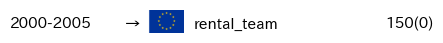

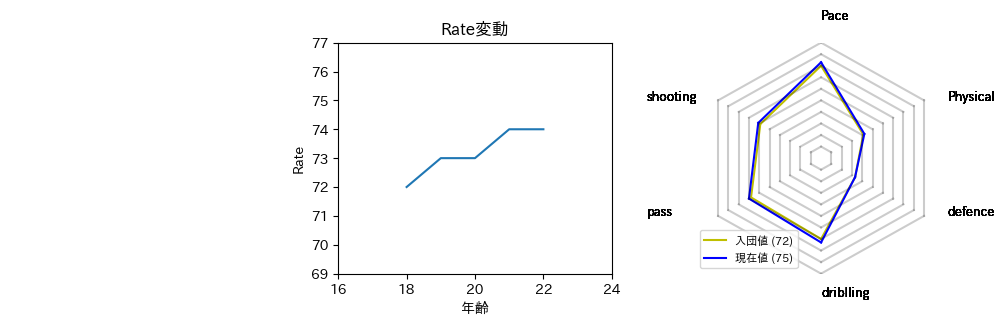

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,怪我欠場,怪我回数,賞,全ポジション回数
81,Lincoln,228922ee-5f45-11ed-a173-00155d3c9514,18,72,4,LW,rental_league,2000,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
3366,Lincoln,228922ee-5f45-11ed-a173-00155d3c9514,19,73,3,LW,rental_league,2001,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
6669,Lincoln,228922ee-5f45-11ed-a173-00155d3c9514,20,73,2,LW,rental_league,2002,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
10054,Lincoln,228922ee-5f45-11ed-a173-00155d3c9514,21,74,1,LW,rental_league,2003,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
13484,Lincoln,228922ee-5f45-11ed-a173-00155d3c9514,22,74,0,LW,rental_league,2004,rental,rental_team,Mallorca,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,


In [8]:
uuid_ = "228922ee-5f45-11ed-a173-00155d3c9514"
print_player(ws, all_member, uuid_)

## 年ごとの結果

In [11]:
year = 2026
league_num = 0
league_name = f"{England.leagues[league_num].name}_{year}"
competition_name = f"FA杯_{year}"
England.leagues[league_num].team_result[league_name]
England.competition_result[competition_name]

NameError: name 'England' is not defined

In [ ]:
output = ws.players_result
output.sort_values("Rate", ascending=False).head(30)

In [ ]:
all_member.sort_values("年齢", ascending=False).head(30)

In [ ]:
all_member[all_member["成長タイプ"]=="legend"]

## 全選手成績

In [ ]:
output = ws.players_result
#output = output[output["チーム"]==ws.country_leagues[0].leagues[league_num].teams[team_num].name]
#output = output[output["分類"]=="リーグ"]
output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS", "怪我欠場"]].sort_values("試合数", ascending=False).head(20)

In [ ]:
uuid_ = "f2cd96d0-5cf0-11ed-8261-00155d3c92e1"
print_player(ws, all_member, uuid_)